#**Data Science Engineering Methods and Tools**

## **Assignment 5** – Neural Network Type Classification | TMNIST

**Name** - Rituja Lolam

**Nuid** - 002146428

# **TMNIST (Typeface MNIST)**

Abstract: The purpose of this notebook is to use a Neural Network technique to classify images from the TMNIST dataset. For this, I utilized a simple Convolutional Neural Network algorithm. 

TMNIST (Typeface based digits MNIST) is a dataset consisting of images representing digits from 0-9 produced using 2,990 google fonts.The dataset contains 299000 examples with labels and font names. The first column represents the name of the font, the second column represents the labels (from 0-9) and the remainining c784 columns represents the grey scale pixel values


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import os
import random
import cv2

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the TMNIST Typeface data

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
url = '/content/drive/MyDrive/TMNIST_Data.csv'
data = pd.read_csv(url)

In [5]:
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

In [6]:
# Shape of the Dataframe
print(f"The Shape of the Dataframe is: {data.shape}")
print(f"Number of Samples: {data.shape[0]}")

The Shape of the Dataframe is: (29900, 786)
Number of Samples: 29900


In [7]:
#Finding unique font names
print(data['names'].unique())

['GrandHotel-Regular' 'EncodeSansCondensed-Medium' 'Varela-Regular' ...
 'CourierPrime-Italic' 'Bentham-Regular' 'AveriaSerifLibre-Ligh']


In [8]:
#No. of unique font names
print(f"Number of unique font names:{data['names'].nunique()}")

Number of unique font names:2990


In [9]:
data['names'].value_counts()

GrandHotel-Regular          10
Laila-Regular               10
Tajawal-Medium              10
Numans-Regular              10
PT_Sans-Web-Italic          10
                            ..
Thasadith-Bold              10
CherryBomb-Regular          10
NotoSansOriyaUI-Thin        10
Kodchasan-SemiBoldItalic    10
AveriaSerifLibre-Ligh       10
Name: names, Length: 2990, dtype: int64

In [10]:
data.describe()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,...,29900.000000,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003445,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.493058,0.005783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
N=list(range(len(data)))
n=len(data)
print(n)
random.seed(2021)
random.shuffle(N)

29900


In [12]:
trainY=data.loc[N[0:(n//4)*3],'labels']
testY=data.loc[N[(n//4)*3:],'labels']
data1=data.drop(['names','labels'],axis=1)
trainX=data1.loc[N[0:(n//4)*3]]
testX=data1.loc[N[(n//4)*3:]]

In [13]:
binencoder = LabelBinarizer()
y0 = trainY
y = binencoder.fit_transform(y0)
y

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
X_images = trainX.values.reshape(-1,28,28)
test_images = testX.values.reshape(-1,28,28)

print(X_images.shape)
print(test_images.shape)

(22425, 28, 28)
(7475, 28, 28)


# Plotting random samples from data

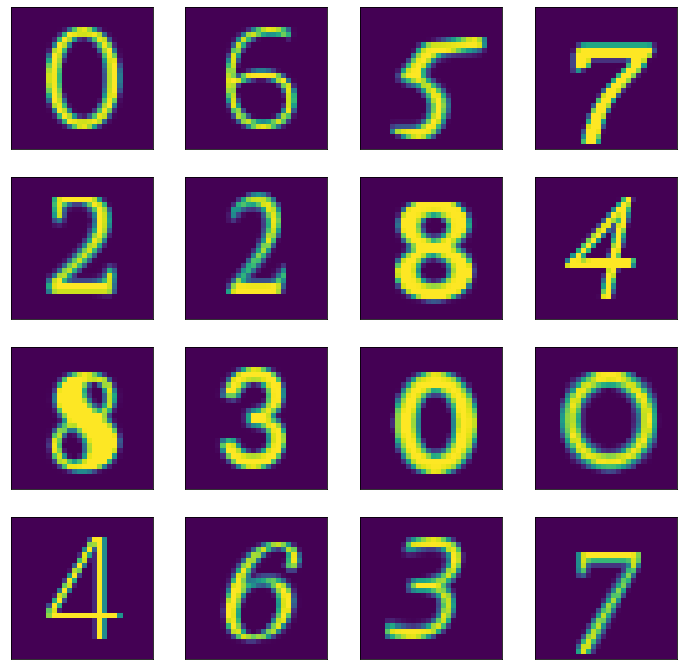

In [15]:
fig,axs = plt.subplots(4,4,figsize=(12,12))
for i in range(16):
    r=i//4
    c=i%4
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i])
plt.show()

# Splitting the data into train and test set
Split the data into 80% train and 20% test data sets



In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_images, y, test_size = 0.2, random_state=90)

In [17]:
#Checking the counts of train and test data
print(f"X train Shape data:{X_train.shape}")
print(f"X test Shape data:{X_test.shape}")
print(f"Y train Shape data:{y_train.shape}")
print(f"Y test Shape data:{y_test.shape}")

X train Shape data:(17940, 28, 28)
X test Shape data:(4485, 28, 28)
Y train Shape data:(17940, 10)
Y test Shape data:(4485, 10)


# Normalizing the data
The pixel values range from 0 to 256 , So dividing all the values by 255 will convert it to range from 0 to 1

In [18]:
X_train = X_train/255
X_test = X_test/255
print(f'Train, Test shapes: {X_train.shape},{X_test.shape}')

Train, Test shapes: (17940, 28, 28),(4485, 28, 28)


In [19]:
X_train = (X_train).reshape(-1,28,28,1).astype('float32')
X_test = (X_test).reshape(-1,28,28,1).astype('float32')

In [20]:
test_images = (test_images/255).reshape(-1,28,28,1).astype('float32')

# Building the CNN model

In [21]:
# Convolutional layers with Maxpool and Dropout 
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [23]:
result = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=92, verbose=2)
result

Epoch 1/20
156/156 - 12s - loss: 0.3736 - accuracy: 0.8974 - val_loss: 0.0926 - val_accuracy: 0.9749 - 12s/epoch - 77ms/step
Epoch 2/20
156/156 - 11s - loss: 0.0754 - accuracy: 0.9793 - val_loss: 0.0757 - val_accuracy: 0.9788 - 11s/epoch - 69ms/step
Epoch 3/20
156/156 - 11s - loss: 0.0536 - accuracy: 0.9845 - val_loss: 0.0689 - val_accuracy: 0.9822 - 11s/epoch - 69ms/step
Epoch 4/20
156/156 - 14s - loss: 0.0405 - accuracy: 0.9889 - val_loss: 0.0626 - val_accuracy: 0.9847 - 14s/epoch - 89ms/step
Epoch 5/20
156/156 - 12s - loss: 0.0330 - accuracy: 0.9905 - val_loss: 0.0613 - val_accuracy: 0.9863 - 12s/epoch - 79ms/step
Epoch 6/20
156/156 - 11s - loss: 0.0269 - accuracy: 0.9911 - val_loss: 0.0652 - val_accuracy: 0.9844 - 11s/epoch - 68ms/step
Epoch 7/20
156/156 - 11s - loss: 0.0272 - accuracy: 0.9919 - val_loss: 0.0505 - val_accuracy: 0.9858 - 11s/epoch - 69ms/step
Epoch 8/20
156/156 - 11s - loss: 0.0230 - accuracy: 0.9930 - val_loss: 0.0484 - val_accuracy: 0.9880 - 11s/epoch - 68ms/step


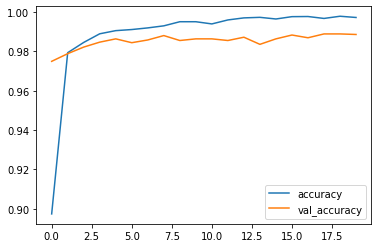

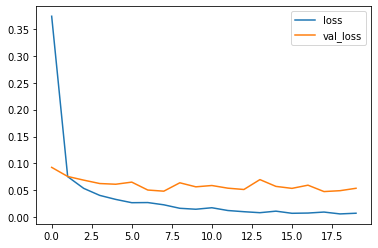

In [24]:
his = pd.DataFrame(result.history)
his.loc[:, ['accuracy', 'val_accuracy']].plot()
his.loc[:, ['loss', 'val_loss']].plot()

# Model Predictions

In [25]:
y_pred = model.predict(test_images)
print(y_pred[0])

[7.6235004e-08 1.2781129e-07 5.9121770e-09 9.8719019e-01 6.7051175e-08
 1.2769191e-02 9.5627954e-08 5.9187386e-07 3.3187185e-05 6.4611518e-06]


In [26]:
y_pred2=[]
for item in y_pred:   
    y_pred2+=[np.argmax(item)   ]
PRED=np.array(y_pred2)
ANS=np.array(testY)
print(PRED[0:10])
print(ANS[0:10])

[3 3 1 2 0 2 9 2 8 6]
[3 3 1 2 0 2 9 2 8 6]


In [27]:
accuracy_score(ANS,PRED)

0.991304347826087

# Visualizing random predictions

Model Prediction:  3


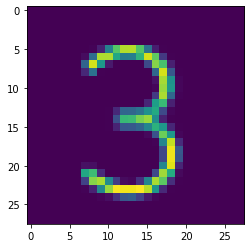

In [28]:
#Predicting a digits using the trained model
idx = 2200
plt.imshow(X_test[idx].reshape(28,28))
model_prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1))

print("Model Prediction: ", model_prediction.argmax())

Model Prediction:  7


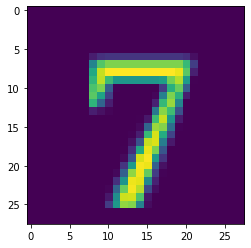

In [29]:
#Predicting a digits using the trained model
idx = 100
plt.imshow(X_test[idx].reshape(28,28))
model_prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1))

print("Model Prediction: ", model_prediction.argmax())

Model Prediction:  4


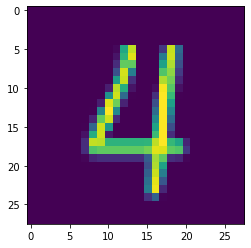

In [30]:
#Predicting a digits using the trained model
idx = 80
plt.imshow(X_test[idx].reshape(28,28))
model_prediction = model.predict(X_test[idx].reshape(1, 28, 28, 1))

print("Model Prediction: ", model_prediction.argmax())

# Conclusion
1. The accuracy of our CNN Sequential model on the test data is 99.03% which is pretty good.
2. The predictions which we made in the end we also fully accurate ( 3 of 3 images were correctly predicted) 


# References
1. Dataset (https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist)
2. CNN (https://www.tensorflow.org/tutorials/images/cnn)
3. Visualization (https://matplotlib.org/stable/index.html)

# License

MIT License

Copyright (c) 2022 Rituja Lolam

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.